# Author : BADAR IFTIKHAR
### LETSGROWMORE  
### LGM VIP JANUARY-2022
### INTERMEDIATE LEVEL TASK 2
### TASK 2 PROJECT :
### Prediction using Decision Tree Algorithm

# Prediction using Decision Tree Algorithm

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dropping the ID column

In [3]:
df.drop('Id',axis=1,inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the Dataset

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data Visualization

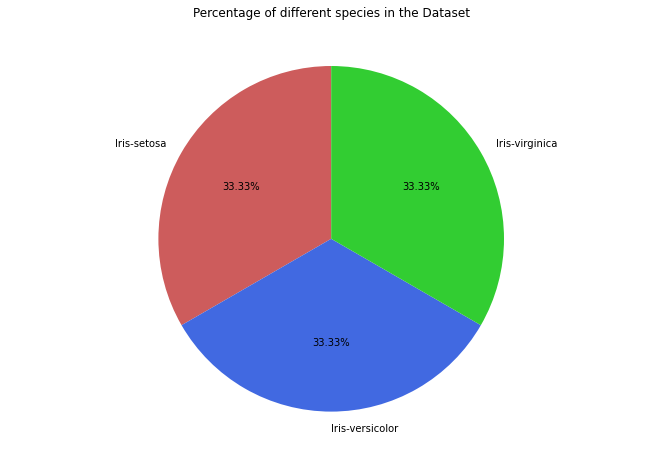

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['indianred','royalblue','limegreen']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

### Species vs Sepal Length

Text(0.5, 1.0, 'Species vs Sepal Length')

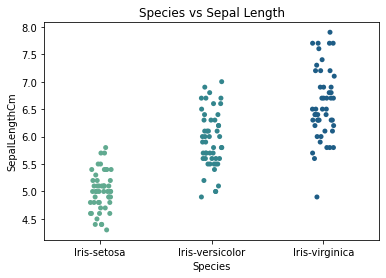

In [8]:
sns.stripplot(x='Species', y='SepalLengthCm', data=df, palette='crest')
plt.title('Species vs Sepal Length')

### Species vs Sepal Width

Text(0.5, 1.0, 'Species vs Sepal Width')

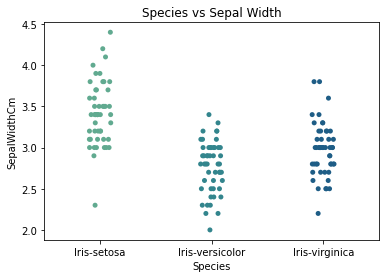

In [9]:
sns.stripplot(x='Species', y='SepalWidthCm', data=df, palette='crest')
plt.title('Species vs Sepal Width')

### Species vs Petal Length

Text(0.5, 1.0, 'Species vs Petal Length')

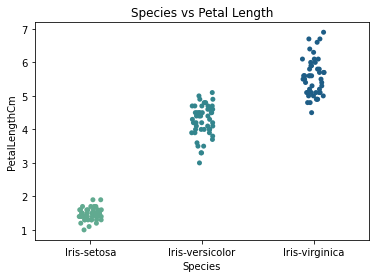

In [10]:
sns.stripplot(x='Species', y='PetalLengthCm', data=df, palette='crest')
plt.title('Species vs Petal Length')

### Species vs Petal Width

Text(0.5, 1.0, 'Species vs Petal Width')

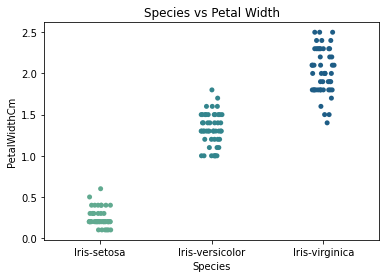

In [11]:
sns.stripplot(x='Species', y='PetalWidthCm', data=df, palette='crest')
plt.title('Species vs Petal Width')

### Species

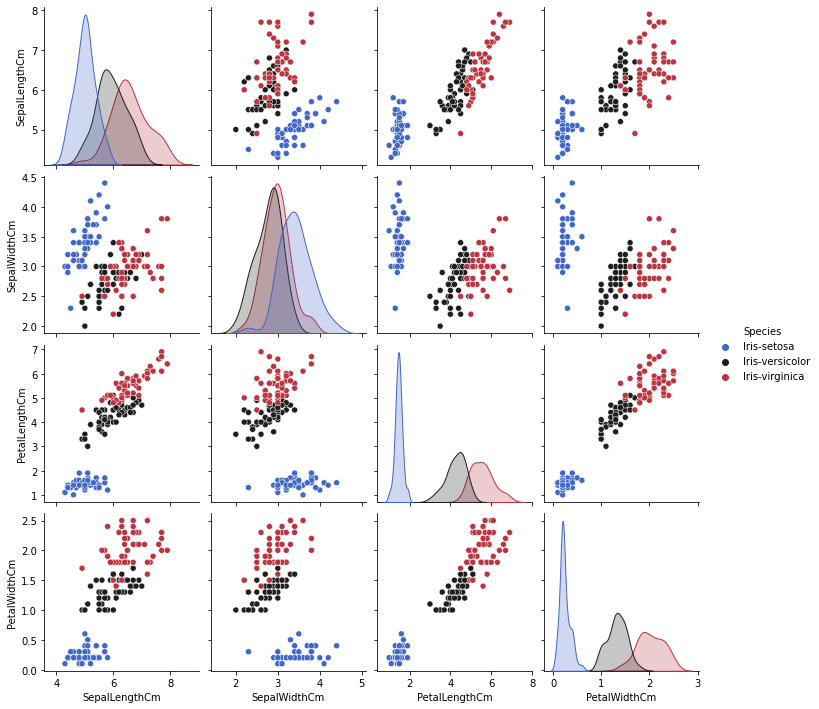

In [12]:
sns.pairplot(df, hue='Species', palette='icefire')
plt.show()

### Feature Correlation Matrix

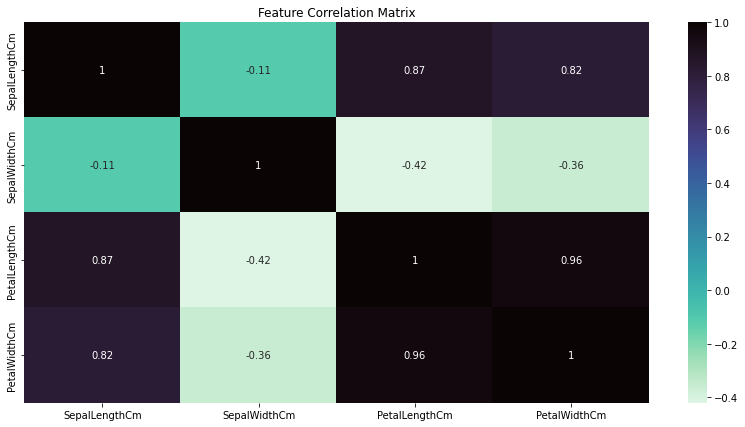

In [13]:
plt.figure(figsize=(14, 7))
matrix = df.corr()
corMat = sns.heatmap(matrix, annot=True, cmap="mako_r")
corMat.set_title("Feature Correlation Matrix")
plt.show()

### Splitting dataset into independent and dependent variables

In [14]:
X = df.drop(['Species'], axis=1)
Y = df['Species']

### Creating the Decision Tree Classifier

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

### Splitting the data into training and testing sets

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", random_state=20)

### Training the Decision Tree Classifier

In [20]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

### Predicting the output using testing set

In [21]:
Y_pred = dtc.predict(X_test)

### Assessing the performance of the model

In [22]:
dfc = df.copy()
dfc = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
dfc.reset_index(inplace = True, drop = True)
dfc.sample(10)

,Actual,Predicted
0,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
20,Iris-virginica,Iris-virginica
40,Iris-virginica,Iris-virginica
21,Iris-versicolor,Iris-versicolor
11,Iris-versicolor,Iris-versicolor
12,Iris-versicolor,Iris-versicolor
31,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


### Accuracy Score & Recall & Precision

In [23]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy Score : {}'.format(accuracy))
print('Recall :{}'.format(metrics.recall_score(Y_test, Y_pred, average='macro')))
print('Precision :{}'.format(metrics.precision_score(Y_test, Y_pred, average='macro')))

Accuracy Score : 0.9777777777777777
Recall :0.9814814814814815
Precision :0.9722222222222222


### Classification Report

In [24]:
print('Classification Report:')
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Confusion Matrix

In [25]:
print('Confusion Matrix:\n')
print(metrics.confusion_matrix(Y_test, Y_pred))

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### HeatMap

Heatmap:

AxesSubplot(0.125,0.125;0.62x0.755)


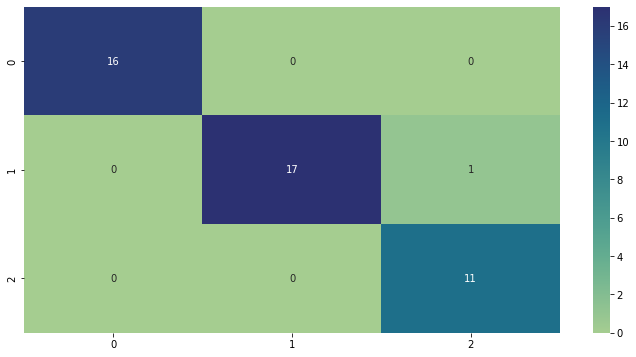

In [26]:
print('Heatmap:\n')
plt.figure(figsize=(12, 6))
print(sns.heatmap(metrics.confusion_matrix(Y_test, Y_pred), annot = True, cmap = 'crest'))

### Plotting the Decision Tree

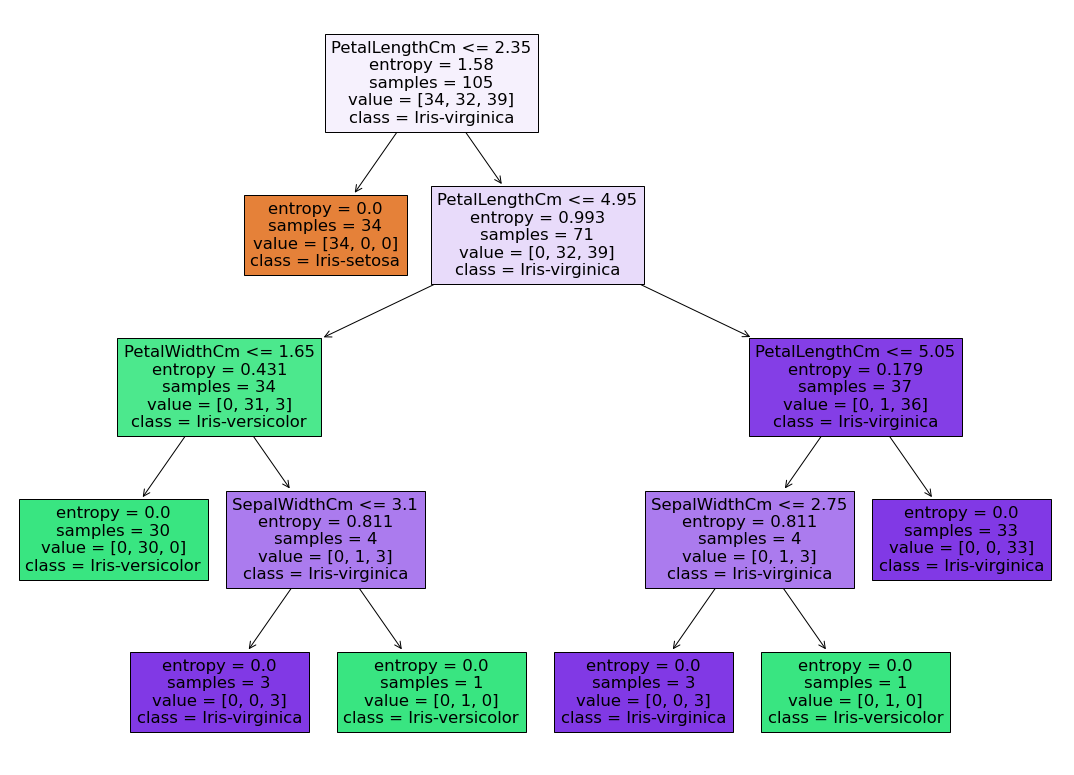

In [27]:
features = df.columns[:-1]
classes = df['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(dtc, feature_names=features, class_names=classes, filled=True)
plt.show()